In [1]:
# Mount for Google Colab

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

%cd '/content/gdrive/My Drive/Masters_Thesis'


Mounted at /content/gdrive
/content/gdrive/My Drive/Masters_Thesis


In [2]:
!pip install stepmix # library used to build LCA model

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from stepmix.stepmix import StepMix

from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

np.random.seed(42) # Seed for reproducibility

In [4]:
# Provide the filename of your Excel file
file_name = 'uu_preprocessed.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(file_name)


#Splitting data into answers for ALL TESTS

In [5]:
# Specify the column names you want to keep
columns_to_keep = ['question_id', 'maingroup', 'level1subgroup']

# Subset the DataFrame using the specified columns
df1 = df.loc[:, columns_to_keep]

#df1 = df1.drop(['maingroup'], axis=1)
qs = df1.drop_duplicates(subset='question_id')
qs = qs.sort_values('level1subgroup')

qs = qs.dropna(subset=['level1subgroup'])

# Create the 'short_name' column
qs['short_name'] = ''
qs
# Personality
count_a = 1
count_c = 1
count_i = 1
count_o = 1
count_r = 1
count_s = 1

# Work_values
count_dp = 1
count_toe = 1
count_r2 = 1
count_c2 = 1
count_s2 = 1
count_i2 = 1

# Work_Styles
count_peo_o = 1
count_si = 1
count_a2 = 1
count_d2 = 1
count_pi = 1
count_per_o = 1
count_i3 = 1

# Skills
count_cont = 1
count_p = 1
count_so = 1
count_cp = 1
count_t = 1
count_sy = 1
count_rm = 1

for index, row in qs.iterrows():
    if row['level1subgroup'] == 'Artistiek':
        qs.at[index, 'short_name'] = f'art{count_a}'
        count_a += 1

    elif row['level1subgroup'] == 'Conventioneel':
        qs.at[index, 'short_name'] = f'con{count_c}'
        count_c += 1

    elif row['level1subgroup'] == 'Intellectueel':
        qs.at[index, 'short_name'] = f'int{count_i}'
        count_i += 1

    elif row['level1subgroup'] == 'Ondernemend':
        qs.at[index, 'short_name'] = f'ond{count_o}'
        count_o += 1

    elif row['level1subgroup'] == 'Realistisch':
        qs.at[index, 'short_name'] = f'rea{count_r}'
        count_r += 1
    elif row['level1subgroup'] == 'Sociaal':
        qs.at[index, 'short_name'] = f'soc{count_s}'
        count_s += 1
############################################

    elif row['level1subgroup'] == 'Prestaties leveren':
        qs.at[index, 'short_name'] = f'drp{count_dp}'
        count_dp += 1

    elif row['level1subgroup'] == 'Arbeidsvoorwaarden':
        qs.at[index, 'short_name'] = f'toe{count_toe}'
        count_toe += 1

    elif row['level1subgroup'] == 'Erkenning':
        qs.at[index, 'short_name'] = f'rec{count_r2}'
        count_r2 += 1

    elif row['level1subgroup'] == 'Collegialiteit':
        qs.at[index, 'short_name'] = f'col{count_c2}'
        count_c2 += 1

    elif row['level1subgroup'] == 'Ondersteuning':
        qs.at[index, 'short_name'] = f'sup{count_s2}'
        count_s2 += 1

    elif row['level1subgroup'] == 'Onafhankelijkheid' and row['maingroup'] == 'tests.workvalues.title':
        qs.at[index, 'short_name'] = f'ind{count_i2}'
        count_i2 += 1
############################################

    elif row['level1subgroup'] == 'Gerichtheid op mensen':
        qs.at[index, 'short_name'] = f'peo{count_peo_o}'
        count_peo_o += 1

    elif row['level1subgroup'] == 'Sociale invloed':
        qs.at[index, 'short_name'] = f'sin{count_si}'
        count_si += 1

    elif row['level1subgroup'] == 'Aanpassingsvermogen':
        qs.at[index, 'short_name'] = f'ada{count_a2}'
        count_a2 += 1

    elif row['level1subgroup'] == 'Zorgvuldigheid':
        qs.at[index, 'short_name'] = f'dil{count_d2}'
        count_d2 += 1

    elif row['level1subgroup'] == 'Praktisch inzicht':
        qs.at[index, 'short_name'] = f'pin{count_pi}'
        count_pi += 1

    elif row['level1subgroup'] == 'Prestatiegerichtheid':
        qs.at[index, 'short_name'] = f'per{count_per_o}'
        count_per_o += 1

    elif row['level1subgroup'] == 'Onafhankelijkheid':
        qs.at[index, 'short_name'] = f'inde{count_i3}'
        count_i3 += 1
############################################

    elif row['level1subgroup'] == 'content':
        qs.at[index, 'short_name'] = f'cont{count_cont}'
        count_cont += 1

    elif row['level1subgroup'] == 'process':
        qs.at[index, 'short_name'] = f'pro{count_p}'
        count_p += 1

    elif row['level1subgroup'] == 'socialskills':
        qs.at[index, 'short_name'] = f'scs{count_so}'
        count_so += 1

    elif row['level1subgroup'] == 'complexproblemsolving':
        qs.at[index, 'short_name'] = f'cps{count_cp}'
        count_cp += 1

    elif row['level1subgroup'] == 'technicalskills':
        qs.at[index, 'short_name'] = f'tec{count_t}'
        count_t += 1

    elif row['level1subgroup'] == 'systemskills':
        qs.at[index, 'short_name'] = f'sys{count_sy}'
        count_sy += 1

    elif row['level1subgroup'] == 'resourcemanagementskills':
        qs.at[index, 'short_name'] = f'rms{count_rm}'
        count_rm += 1

qs = qs.drop(['maingroup'], axis=1)
qs

,question_id,level1subgroup,short_name
134,2404,Aanpassingsvermogen,ada1
133,2405,Aanpassingsvermogen,ada2
132,2406,Aanpassingsvermogen,ada3
111,2351,Arbeidsvoorwaarden,toe1
115,2352,Arbeidsvoorwaarden,toe2
...,...,...,...
678,2555,technicalskills,tec6
677,2554,technicalskills,tec7
675,2552,technicalskills,tec8
682,2559,technicalskills,tec9


In [6]:
n_qs = qs.drop(['level1subgroup'], axis=1)

# merging (left join) studeies to orginal dataframe
new_qs = pd.merge(df, n_qs, on='question_id', how='left')
new_qs.head(3)
new_qs = new_qs.dropna(subset=['level1subgroup'])
new_qs

,dossier_id,question_id,answer,label,maingroup,maingroup_id,level1subgroup,level1subgroup_id,faculty,short_name
0,1152,2281,0.75,rapporten schrijven,Beroepskeuzetest,459.0,Conventioneel,457,Faculteit Geesteswetenschappen,con11
1,1152,2263,0.75,intuïtief zijn,Beroepskeuzetest,459.0,Artistiek,454,Faculteit Geesteswetenschappen,art16
2,1152,2269,0.75,je gevoelens duidelijk uiten,Beroepskeuzetest,459.0,Sociaal,455,Faculteit Geesteswetenschappen,soc4
3,1152,2278,0.75,activiteiten en evenementen organiseren,Beroepskeuzetest,459.0,Ondernemend,456,Faculteit Geesteswetenschappen,ond3
4,1152,2280,0.75,onderdeel zijn van een organisatie,Beroepskeuzetest,459.0,Conventioneel,457,Faculteit Geesteswetenschappen,con17
...,...,...,...,...,...,...,...,...,...,...
117734,91930,2411,0.80,Om mijn werk goed te doen heb je creativiteit ...,tests.workstyles.title,516.0,Praktisch inzicht,530,Faculteit Geesteswetenschappen,pin1
117735,91930,2397,0.40,Om mijn werk goed te doen is het belangrijk om...,tests.workstyles.title,516.0,Prestatiegerichtheid,531,Faculteit Geesteswetenschappen,per1
117736,91930,2398,0.60,Om mijn werk goed te doen is doorzettingsvermo...,tests.workstyles.title,516.0,Prestatiegerichtheid,531,Faculteit Geesteswetenschappen,per3
117737,91930,2399,0.60,Om mijn werk goed te doen is het belangrijk om...,tests.workstyles.title,516.0,Prestatiegerichtheid,531,Faculteit Geesteswetenschappen,per2


In [7]:
# Create pivot table for Questions
qs_data = pd.pivot_table(new_qs, values='answer', index='dossier_id', columns='short_name')

# Reset the index of 'qs_data'
qs_data = qs_data.reset_index()
# Remove the index name 'short_name'
qs_data = qs_data.rename_axis(None, axis=1)

#Remove NANs
qs_data.replace('', np.nan, inplace=True)
qs_data = qs_data.dropna()
qs_data

,dossier_id,ada1,ada2,ada3,art1,art10,art11,art12,art13,art14,...,tec6,tec7,tec8,tec9,toe1,toe2,toe3,toe4,toe5,toe6
4,2112,0.2,0.8,0.6,0.25,1.00,1.00,0.75,0.75,0.25,...,0.000000,0.500000,0.500000,0.000000,0.2,0.6,0.2,0.0,0.0,0.0
9,42916,0.4,0.6,0.4,0.50,0.75,0.75,0.50,1.00,0.75,...,0.333333,0.500000,0.500000,0.500000,0.6,0.8,0.6,0.8,0.6,0.6
30,55937,0.2,0.6,0.4,0.00,0.75,1.00,0.25,1.00,0.75,...,0.166667,0.666667,0.666667,0.333333,0.0,0.6,0.2,0.4,0.2,0.0
34,56999,0.8,0.8,0.8,1.00,1.00,0.00,0.75,0.50,0.50,...,0.166667,0.500000,0.500000,0.500000,0.4,0.6,0.8,0.2,0.0,0.0
37,57697,0.8,0.6,0.2,1.00,1.00,1.00,0.75,1.00,0.75,...,0.333333,0.500000,0.666667,0.166667,0.0,0.8,0.2,0.0,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,91848,0.8,0.8,0.8,0.75,0.75,0.75,1.00,0.75,0.25,...,0.333333,0.333333,0.333333,0.000000,0.8,0.8,0.4,0.4,0.4,0.4
745,91894,1.0,0.8,0.6,0.75,1.00,0.50,0.75,0.75,1.00,...,0.166667,0.166667,0.666667,0.666667,0.6,0.8,0.4,0.4,0.4,0.2
747,91927,0.8,0.6,0.6,0.50,0.50,0.50,0.75,0.75,0.75,...,0.000000,0.333333,0.500000,0.166667,0.6,0.6,0.4,0.6,0.4,0.4
748,91928,0.8,1.0,1.0,0.00,0.75,0.75,0.50,0.75,0.00,...,0.666667,0.833333,0.500000,0.666667,0.6,0.6,0.8,0.6,0.6,0.6


In [8]:
model = qs_data.drop('dossier_id', axis=1)

# Define a custom sorting function
def custom_sort(column):
    prefix = column[:-1]  # Extract the prefix (e.g., "art" or "soc")
    suffix = int(column[-1])  # Extract the numerical suffix
    return prefix, suffix

# Get the column names and sort them using the custom sort function
sorted_columns = sorted(model.columns, key=custom_sort)

#Assign the sorted column names back to Data frame
model = model[sorted_columns]

model
# Collect data for LCA before possible K-Means manipulation
data_lca = model

In [9]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [10]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# creating X variable to use as to not effect the model data
X = model

# Define the range of cluster numbers to test
n_clusters_range = range(2, 10)
wcss = [] # wcss metric to collect enertia values for elbow method

# Initialize dictionaries to store the metrics
metrics = {
    'silhouette': [],
    'calinski_harabasz': [],
    'davies_bouldin': [],
    'n_clusters': []
}

# Loop over the cluster numbers and perform clustering
for i, n_clusters in enumerate(n_clusters_range):

    # Run hierarchical clustering using the ward linkage method
    ward_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    ward_cluster.fit(X)
    ward_labels = ward_cluster.labels_
    linkage_matrix = ward_cluster.children_

    # Extract the cluster centroids from the linkage matrix
    centroids = []
    for j in range(n_clusters):
        indices = ward_labels == j
        centroid = X[indices].mean(axis=0)
        centroids.append(centroid)
    kmeans_cluster = KMeans(n_clusters=n_clusters, init=centroids, n_init=1, random_state=0)
    kmeans_cluster.fit(X)
    cluster_labels = kmeans_cluster.labels_

    # Calculate the metrics for the current cluster assignment
    inertia = kmeans_cluster.inertia_
    silhouette = silhouette_score(X, kmeans_cluster.labels_)
    calinski_harabasz = calinski_harabasz_score(X, kmeans_cluster.labels_)
    davies_bouldin = davies_bouldin_score(X, kmeans_cluster.labels_)

    # Store the metrics in the dictionary
    metrics['silhouette'].append(silhouette)
    metrics['calinski_harabasz'].append(calinski_harabasz)
    metrics['davies_bouldin'].append(davies_bouldin)
    metrics['n_clusters'].append(n_clusters)
    wcss.append(kmeans_cluster.inertia_)

# Convert the metrics dictionary to dataframe
metrics_df = pd.DataFrame(metrics)

metrics_df

,silhouette,calinski_harabasz,davies_bouldin,n_clusters
0,0.069125,20.643308,3.413048,2
1,0.047515,15.929153,3.164261,3
2,0.037393,12.928626,3.589109,4
3,0.030507,11.084761,3.704418,5
4,0.029129,10.106609,3.425862,6
5,0.028031,9.331542,3.299111,7
6,0.031160,8.592298,3.348996,8
7,0.029452,7.983653,3.421505,9


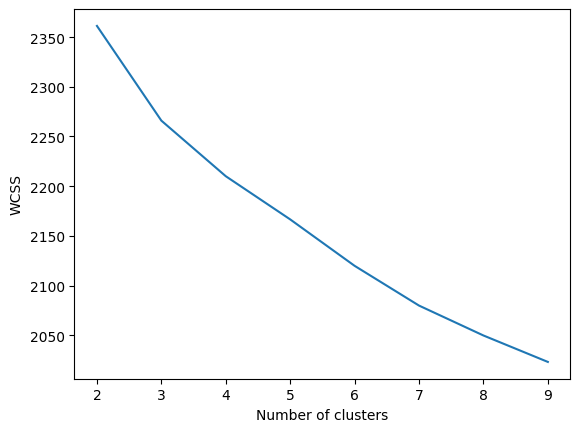

In [11]:
# Plot Elbow
plt.plot(n_clusters_range, wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<Axes: xlabel='PC1', ylabel='PC2'>

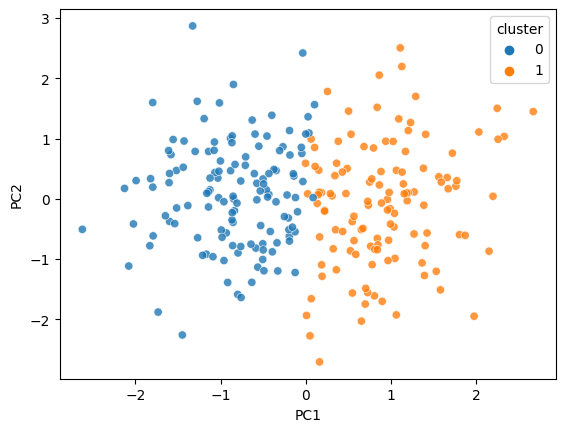

In [12]:
# Create K-Means Cluster Model
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA

seed = 1234 # Used for reproducibility

kmeans = KMeans(n_clusters=2, n_init = 10, random_state=seed)
k_fit = kmeans.fit(model)
centroids = kmeans.cluster_centers_
predictions = k_fit.labels_

# Develop 2 PCA components for visualizations
pca = PCA(2)
pca_data = pd.DataFrame(pca.fit_transform(model),columns=['PC1','PC2'])

# To maintain cluster colours to allow for easier comparison between cluster plots
colour_dict = dict({0: sns.color_palette("tab10")[1], 1: sns.color_palette("tab10")[0]})

pca_data['cluster'] = pd.Categorical(predictions)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data, palette="tab10", alpha=0.8)

In [ ]:
#pca_data.to_excel('ALL_TESTS_clusters.xlsx', index=False) # to be used for comparison in personality notebook

#Latent Class Analysis

In [ ]:
from sklearn.model_selection import ParameterGrid

# Create LCA model with StepMix function
model = StepMix(n_components=3, measurement="categorical", verbose=1, random_state=123, n_init=10)

grid = {
    'n_components': [2, 3, 4, 5, 6, 7, 8, 9],
    'n_steps' : [1]
}

results = dict(param_n_steps=[], param_n_components=[], aic=[], bic=[])


# Same model and grid as above
for g in ParameterGrid(grid):
    model.set_params(**g)
    model.fit(data_lca)
    results['param_n_steps'].append(g['n_steps'])
    results['param_n_components'].append(g['n_components'])
    results['aic'].append(model.aic(data_lca))
    results['bic'].append(model.bic(data_lca))

# Save results to a dataframe
results = pd.DataFrame(results)

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 10/10 [00:16<00:00,  1.67s/it, max_LL=-1.43e+4, max_avg_LL=-57.1]


MODEL REPORT
    Measurement model parameters
        ------------------------------------------------------------------------
        Multinoulli model with 178 features, each with 6 possible outcomes
        ------------------------------------------------------------------------
        Columns 1 to 6 are associated with the first feature,
        columns 7 to 12 are associated with the second feature, etc.

        Class 1 : [0.9015 0.0985 0.0000 ... 0.1912 0.1506 0.1621]
        Class 2 : [0.8257 0.1743 0.0000 ... 0.2188 0.3264 0.0735]
    Class weights
        Class 1 : 0.56
        Class 2 : 0.44
    Fit for 2 latent classes
    Estimation method             : 1-step
    Number of observations        : 251
    Number of latent classes      : 2
    Number of estimated parameters: 2125
    Log-likelihood (LL)           : -14324.2873
    -2LL                          : 28648.5747
    Average LL                    : -57.0689
    AIC                           : 32898.57
    BIC      

Initializations (n_init) : 100%|██████████| 10/10 [00:20<00:00,  2.05s/it, max_LL=-1.39e+4, max_avg_LL=-55.5]


MODEL REPORT
    Measurement model parameters
        ------------------------------------------------------------------------
        Multinoulli model with 178 features, each with 6 possible outcomes
        ------------------------------------------------------------------------
        Columns 1 to 6 are associated with the first feature,
        columns 7 to 12 are associated with the second feature, etc.

        Class 1 : [0.7854 0.2146 0.0000 ... 0.3287 0.3996 0.0288]
        Class 2 : [0.9144 0.0856 0.0000 ... 0.0125 0.1985 0.1736]
        Class 3 : [0.8895 0.1105 0.0000 ... 0.2709 0.1290 0.1492]
    Class weights
        Class 1 : 0.28
        Class 2 : 0.32
        Class 3 : 0.40
    Fit for 3 latent classes
    Estimation method             : 1-step
    Number of observations        : 251
    Number of latent classes      : 3
    Number of estimated parameters: 3188
    Log-likelihood (LL)           : -13920.3580
    -2LL                          : 27840.7161
    Average LL

Initializations (n_init) : 100%|██████████| 10/10 [00:31<00:00,  3.17s/it, max_LL=-1.37e+4, max_avg_LL=-54.4]


MODEL REPORT
    Measurement model parameters
        ------------------------------------------------------------------------
        Multinoulli model with 178 features, each with 6 possible outcomes
        ------------------------------------------------------------------------
        Columns 1 to 6 are associated with the first feature,
        columns 7 to 12 are associated with the second feature, etc.

        Class 1 : [0.8309 0.1691 0.0000 ... 0.5762 0.2971 0.0000]
        Class 2 : [0.9068 0.0932 0.0000 ... 0.0000 0.1864 0.2109]
        Class 3 : [0.7568 0.2432 0.0000 ... 0.1990 0.4207 0.0000]
        Class 4 : [0.9144 0.0856 0.0000 ... 0.1596 0.1278 0.1839]
    Class weights
        Class 1 : 0.19
        Class 2 : 0.26
        Class 3 : 0.18
        Class 4 : 0.38
    Fit for 4 latent classes
    Estimation method             : 1-step
    Number of observations        : 251
    Number of latent classes      : 4
    Number of estimated parameters: 4251
    Log-likelihood (

Initializations (n_init) : 100%|██████████| 10/10 [00:18<00:00,  1.88s/it, max_LL=-1.34e+4, max_avg_LL=-53.4]


MODEL REPORT
    Measurement model parameters
        ------------------------------------------------------------------------
        Multinoulli model with 178 features, each with 6 possible outcomes
        ------------------------------------------------------------------------
        Columns 1 to 6 are associated with the first feature,
        columns 7 to 12 are associated with the second feature, etc.

        Class 1 : [0.7725 0.2275 0.0000 ... 0.2957 0.3869 0.0455]
        Class 2 : [0.8070 0.1930 0.0000 ... 0.6781 0.2571 0.0000]
        Class 3 : [0.8996 0.1004 0.0000 ... 0.0000 0.1753 0.2473]
        Class 4 : [0.9297 0.0703 0.0000 ... 0.1988 0.1159 0.1988]
        Class 5 : [0.8605 0.1395 0.0000 ... 0.0000 0.3008 0.0399]
    Class weights
        Class 1 : 0.18
        Class 2 : 0.12
        Class 3 : 0.16
        Class 4 : 0.34
        Class 5 : 0.20
    Fit for 5 latent classes
    Estimation method             : 1-step
    Number of observations        : 251
    Number

Initializations (n_init) : 100%|██████████| 10/10 [00:29<00:00,  2.95s/it, max_LL=-1.31e+4, max_avg_LL=-52.3]


MODEL REPORT
    Measurement model parameters
        ------------------------------------------------------------------------
        Multinoulli model with 178 features, each with 6 possible outcomes
        ------------------------------------------------------------------------
        Columns 1 to 6 are associated with the first feature,
        columns 7 to 12 are associated with the second feature, etc.

        Class 1 : [0.8531 0.1469 0.0000 ... 0.0965 0.1841 0.1167]
        Class 2 : [0.8979 0.1021 0.0000 ... 0.2196 0.1019 0.2042]
        Class 3 : [0.8778 0.1222 0.0000 ... 0.6215 0.2914 0.0000]
        Class 4 : [0.9167 0.0833 0.0000 ... 0.0000 0.1659 0.1948]
        Class 5 : [0.7102 0.2898 0.0000 ... 0.2897 0.4479 0.0527]
        Class 6 : [1.0000 0.0000 0.0000 ... 0.0000 0.2917 0.1246]
    Class weights
        Class 1 : 0.24
        Class 2 : 0.23
        Class 3 : 0.14
        Class 4 : 0.14
        Class 5 : 0.15
        Class 6 : 0.10
    Fit for 6 latent classes
    

Initializations (n_init) : 100%|██████████| 10/10 [00:14<00:00,  1.48s/it, max_LL=-1.31e+4, max_avg_LL=-52.2]


MODEL REPORT
    Measurement model parameters
        ------------------------------------------------------------------------
        Multinoulli model with 178 features, each with 6 possible outcomes
        ------------------------------------------------------------------------
        Columns 1 to 6 are associated with the first feature,
        columns 7 to 12 are associated with the second feature, etc.

        Class 1 : [0.6775 0.3225 0.0000 ... 0.2580 0.4515 0.0000]
        Class 2 : [0.8928 0.1072 0.0000 ... 0.0000 0.4284 0.0715]
        Class 3 : [0.8660 0.1340 0.0000 ... 0.0000 0.1676 0.2344]
        Class 4 : [0.9397 0.0603 0.0000 ... 0.0000 0.2112 0.0615]
        Class 5 : [0.9120 0.0880 0.0000 ... 0.3838 0.2936 0.1173]
        Class 6 : [0.8448 0.1552 0.0000 ... 0.0892 0.1322 0.2007]
        Class 7 : [0.9193 0.0807 0.0000 ... 0.5174 0.0613 0.1391]
    Class weights
        Class 1 : 0.12
        Class 2 : 0.11
        Class 3 : 0.12
        Class 4 : 0.13
        Class

Initializations (n_init) : 100%|██████████| 10/10 [00:15<00:00,  1.59s/it, max_LL=-1.29e+4, max_avg_LL=-51.3]


MODEL REPORT
    Measurement model parameters
        ------------------------------------------------------------------------
        Multinoulli model with 178 features, each with 6 possible outcomes
        ------------------------------------------------------------------------
        Columns 1 to 6 are associated with the first feature,
        columns 7 to 12 are associated with the second feature, etc.

        Class 1 : [0.9142 0.0858 0.0000 ... 0.4569 0.1715 0.2858]
        Class 2 : [0.9233 0.0767 0.0000 ... 0.0000 0.2307 0.0000]
        Class 3 : [0.9231 0.0769 0.0000 ... 0.0256 0.2059 0.1277]
        Class 4 : [0.5330 0.4670 0.0000 ... 0.1334 0.6671 0.0000]
        Class 5 : [0.7202 0.2798 0.0000 ... 0.2804 0.3997 0.0000]
        Class 6 : [0.9185 0.0815 0.0000 ... 0.1227 0.1216 0.1840]
        Class 7 : [0.8460 0.1540 0.0000 ... 0.4867 0.0521 0.1798]
        Class 8 : [0.9565 0.0435 0.0000 ... 0.0000 0.3903 0.0000]
    Class weights
        Class 1 : 0.14
        Class 2 

Initializations (n_init) : 100%|██████████| 10/10 [00:14<00:00,  1.47s/it, max_LL=-1.27e+4, max_avg_LL=-50.8]

MODEL REPORT
    Measurement model parameters
        ------------------------------------------------------------------------
        Multinoulli model with 178 features, each with 6 possible outcomes
        ------------------------------------------------------------------------
        Columns 1 to 6 are associated with the first feature,
        columns 7 to 12 are associated with the second feature, etc.

        Class 1 : [0.8867 0.1133 0.0000 ... 0.2284 0.0987 0.1968]
        Class 2 : [0.9440 0.0560 0.0000 ... 0.8332 0.1113 0.0000]
        Class 3 : [0.7500 0.2500 0.0000 ... 0.1875 0.3125 0.0000]
        Class 4 : [0.9092 0.0908 0.0000 ... 0.0000 0.1836 0.0000]
        Class 5 : [0.7201 0.2799 0.0000 ... 0.0000 0.6399 0.0000]
        Class 6 : [0.8856 0.1144 0.0000 ... 0.2289 0.1525 0.2292]
        Class 7 : [0.9467 0.0533 0.0000 ... 0.0265 0.2370 0.1059]
        Class 8 : [0.8947 0.1053 0.0000 ... 0.0000 0.0527 0.4740]
        Class 9 : [0.8049 0.1951 0.0000 ... 0.4631 0.3835

In [ ]:
results

,param_n_steps,param_n_components,aic,bic
0,1,2,32898.574658,40390.162154
1,1,3,34216.716079,45455.860049
2,1,4,35813.398502,50800.098946
3,1,5,37454.672535,56188.929454
4,1,6,39015.718038,61497.531431
5,1,7,41070.124906,67299.494773
6,1,8,42761.978217,72738.904559
7,1,9,44608.765034,78333.247849
